# 제주 빅데이터 공모전

### 필요한 모듈, 한글 폰트 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print ('설정파일 위치: ', mpl.matplotlib_fname())

font_list_mac = fm.OSXInstalledFonts()
print(len(font_list_mac))

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

버전:  3.2.2
설치 위치:  /opt/anaconda3/envs/venv36/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /Users/keom/.matplotlib
캐시 위치:  /Users/keom/.matplotlib
설정파일 위치:  /opt/anaconda3/envs/venv36/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
362


/opt/anaconda3/envs/venv36/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The OSXInstalledFonts function was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  


[('Noto Sans Gothic',
  '/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf'),
 ('Apple SD Gothic Neo', '/System/Library/Fonts/AppleSDGothicNeo.ttc'),
 ('AppleGothic', '/System/Library/Fonts/Supplemental/AppleGothic.ttf'),
 ('Hiragino Maru Gothic Pro', '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc')]

In [4]:
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
 
#폰트 경로
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
 
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
 
#font 설정
matplotlib.rc('font',family=font_name)

In [5]:
data = pd.read_csv("./jeju_data_ver1/201901-202003.csv", parse_dates= True)

sub = pd.read_csv("./jeju_data_ver1/submission.csv")

data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [6]:
len(data)

24697792

In [7]:
sub.head()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,202004,강원,건강보조식품 소매업,0
1,1,202004,강원,골프장 운영업,0
2,2,202004,강원,과실 및 채소 소매업,0
3,3,202004,강원,관광 민예품 및 선물용품 소매업,0
4,4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0


### Exploratory Data Analysis

In [8]:
data.isna().sum()/data.shape[0]

REG_YYMM        0.000000
CARD_SIDO_NM    0.000000
CARD_CCG_NM     0.003531
STD_CLSS_NM     0.000000
HOM_SIDO_NM     0.000000
HOM_CCG_NM      0.005984
AGE             0.000000
SEX_CTGO_CD     0.000000
FLC             0.000000
CSTMR_CNT       0.000000
AMT             0.000000
CNT             0.000000
dtype: float64

In [9]:
categorical = ["CARD_SIDO_NM", "CARD_CCG_NM", "STD_CLSS_NM", "HOM_SIDO_NM", "HOM_CCG_NM", 
               "AGE", "SEX_CTGO_CD", "FLC"]
numerical = ["AMT", "CSTMR_CNT", "CNT"]

In [10]:
D1903 = data[data["REG_YYMM"]==201903]
D2003 = data[data["REG_YYMM"]==202003]

D1903[numerical].describe(), D2003[numerical].describe()

(                AMT     CSTMR_CNT           CNT
 count  1.668675e+06  1.668675e+06  1.668675e+06
 mean   2.460281e+06  6.213135e+01  1.256076e+02
 std    1.742438e+07  3.547908e+02  9.351468e+02
 min    1.000000e+03  3.000000e+00  1.000000e+00
 25%    9.140000e+04  4.000000e+00  5.000000e+00
 50%    2.549800e+05  8.000000e+00  1.200000e+01
 75%    8.522000e+05  2.400000e+01  4.100000e+01
 max    2.214023e+09  3.098500e+04  1.008540e+05,
                 AMT     CSTMR_CNT           CNT
 count  1.260508e+06  1.260508e+06  1.260508e+06
 mean   2.727380e+06  6.565853e+01  1.421883e+02
 std    1.846216e+07  3.584025e+02  1.051153e+03
 min    2.000000e+02  3.000000e+00  1.000000e+00
 25%    1.000000e+05  4.000000e+00  6.000000e+00
 50%    2.789300e+05  8.000000e+00  1.300000e+01
 75%    9.395000e+05  2.600000e+01  4.400000e+01
 max    1.929126e+09  2.820500e+04  1.061180e+05)

In [11]:
Jeju1903 = data[data["CARD_SIDO_NM"] == '제주'][data["REG_YYMM"]==201903]
Jeju2003 = data[data["CARD_SIDO_NM"] == '제주'][data["REG_YYMM"]==202003]

/opt/anaconda3/envs/venv36/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/venv36/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [12]:
for i in categorical:
    print(Jeju1903[i].value_counts()[:5])

제주    33499
Name: CARD_SIDO_NM, dtype: int64
제주시     22405
서귀포시    11094
Name: CARD_CCG_NM, dtype: int64
한식 음식점업      3587
면세점          3533
체인화 편의점      3454
수산물 소매업      1719
정기 항공 운송업    1693
Name: STD_CLSS_NM, dtype: int64
경기    8208
서울    7070
부산    2671
제주    2382
인천    1935
Name: HOM_SIDO_NM, dtype: int64
제주시     1270
서귀포시    1112
서구      1067
남구      1000
북구       989
Name: HOM_CCG_NM, dtype: int64
30s    8842
40s    7354
50s    6721
20s    6052
60s    3532
Name: AGE, dtype: int64
1    17305
2    16194
Name: SEX_CTGO_CD, dtype: int64
2    9801
4    7553
1    6409
3    5604
5    4132
Name: FLC, dtype: int64


In [13]:
for i in categorical:
    print(Jeju2003[i].value_counts()[:5])

제주    17902
Name: CARD_SIDO_NM, dtype: int64
제주시     11866
서귀포시     6036
Name: CARD_CCG_NM, dtype: int64
한식 음식점업         2443
체인화 편의점         2347
면세점             1874
서양식 음식점업         992
기타 대형 종합 소매업     930
Name: STD_CLSS_NM, dtype: int64
서울    4819
경기    4576
제주    2253
부산    1341
인천    1179
Name: HOM_SIDO_NM, dtype: int64
제주시     1211
서귀포시    1042
서구       544
남구       448
북구       399
Name: HOM_CCG_NM, dtype: int64
30s    4541
20s    4349
40s    3941
50s    3449
60s    1330
Name: AGE, dtype: int64
1    10194
2     7708
Name: SEX_CTGO_CD, dtype: int64
2    4894
1    4470
4    3858
3    3140
5    1540
Name: FLC, dtype: int64


In [14]:
Jeju1903.groupby(["STD_CLSS_NM"]).sum()[["AMT", "CNT"]]

,AMT,CNT
STD_CLSS_NM,,
건강보조식품 소매업,93076378,682
골프장 운영업,1415478900,12943
과실 및 채소 소매업,1073210801,18646
관광 민예품 및 선물용품 소매업,317364690,9914
그외 기타 스포츠시설 운영업,10513000,650
그외 기타 종합 소매업,2225449200,37137
기타 대형 종합 소매업,5202216930,109366
기타 외국식 음식점업,492990058,15073
기타 주점업,1210881958,6550


In [15]:
Jeju2003.groupby(["STD_CLSS_NM"]).sum()[["AMT", "CNT"]]

,AMT,CNT
STD_CLSS_NM,,
건강보조식품 소매업,80401810,606
골프장 운영업,1227910031,13603
과실 및 채소 소매업,612861477,13211
관광 민예품 및 선물용품 소매업,51733910,2116
그외 기타 분류안된 오락관련 서비스업,313500,20
그외 기타 종합 소매업,3282513600,44840
기타 대형 종합 소매업,4391495540,91153
기타 수상오락 서비스업,1606700,44
기타 외국식 음식점업,412219149,14484


### Data Cleaning

#### 월별 데이터 만들기

In [16]:
data.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum()

SEX_CTGO_CD    FLC  CSTMR_CNT  \
REG_YYMM CARD_SIDO_NM STD_CLSS_NM                                            
201901   강원           건강보조식품 소매업                     144    364       1080   
                      골프장 운영업                       2947   5745      18489   
                      과실 및 채소 소매업                   3184   7597      23566   
                      관광 민예품 및 선물용품 소매업              380    761       1059   
                      그외 기타 스포츠시설 운영업                 26     65        121   
...                                                  ...    ...        ...   
202003   충북           피자 햄버거 샌드위치 및 유사 음식점업         1974   3352      79354   
                      한식 음식점업                      11595  27242     381083   
                      호텔업                             32    102        164   
                      화장품 및 방향제 소매업                  679   1264       8728   
                      휴양콘도 운영업                        48    106        115   

                                                     AMT     CNT  
REG_YYMM CARD_SIDO_NM STD_CLSS_NM                                 
201901   강원           건강보조식품 소매업               148354746    1128  
                      골프장 운영업                 1229200312   33379  
                      과실 및 채소 소매업             1286979106   31050  
                      관광 민예품 및 선물용품 소매업         30656770    1254  
                      그외 기타 스포츠시설 운영업           13101500     168  
...                                                  ...     ...  
202003   충북           피자 햄버거 샌드위치 및 유사 음식점업   1315245299  114308  
                      한식 음식점업                16152482704  554154  
                      호텔업                       15248550     259  
                      화장품 및 방향제 소매업            428881434   10013  
                      휴양콘도 운영업                  12733490     182  

[9438 rows x 5 columns]

In [17]:
def grap_year(data):
    """
    returns year from REG_YYMM
    """
    data = str(data)
    return int(data[:4])

def grap_month(data):
    """
    returns month from REG_YYMM
    """
    data = str(data)
    return int(data[4:])

In [18]:
data.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum()

SEX_CTGO_CD    FLC  CSTMR_CNT  \
REG_YYMM CARD_SIDO_NM STD_CLSS_NM                                            
201901   강원           건강보조식품 소매업                     144    364       1080   
                      골프장 운영업                       2947   5745      18489   
                      과실 및 채소 소매업                   3184   7597      23566   
                      관광 민예품 및 선물용품 소매업              380    761       1059   
                      그외 기타 스포츠시설 운영업                 26     65        121   
...                                                  ...    ...        ...   
202003   충북           피자 햄버거 샌드위치 및 유사 음식점업         1974   3352      79354   
                      한식 음식점업                      11595  27242     381083   
                      호텔업                             32    102        164   
                      화장품 및 방향제 소매업                  679   1264       8728   
                      휴양콘도 운영업                        48    106        115   

                                                     AMT     CNT  
REG_YYMM CARD_SIDO_NM STD_CLSS_NM                                 
201901   강원           건강보조식품 소매업               148354746    1128  
                      골프장 운영업                 1229200312   33379  
                      과실 및 채소 소매업             1286979106   31050  
                      관광 민예품 및 선물용품 소매업         30656770    1254  
                      그외 기타 스포츠시설 운영업           13101500     168  
...                                                  ...     ...  
202003   충북           피자 햄버거 샌드위치 및 유사 음식점업   1315245299  114308  
                      한식 음식점업                16152482704  554154  
                      호텔업                       15248550     259  
                      화장품 및 방향제 소매업            428881434   10013  
                      휴양콘도 운영업                  12733490     182  

[9438 rows x 5 columns]

In [19]:
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))

In [20]:
data['REG_YYMM'] = pd.to_datetime(data['REG_YYMM'], format='%Y%m', errors='raise')

data.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum()

SEX_CTGO_CD    FLC  CSTMR_CNT  \
REG_YYMM   CARD_SIDO_NM STD_CLSS_NM                                            
2019-01-01 강원           건강보조식품 소매업                     144    364       1080   
                        골프장 운영업                       2947   5745      18489   
                        과실 및 채소 소매업                   3184   7597      23566   
                        관광 민예품 및 선물용품 소매업              380    761       1059   
                        그외 기타 스포츠시설 운영업                 26     65        121   
...                                                    ...    ...        ...   
2020-03-01 충북           피자 햄버거 샌드위치 및 유사 음식점업         1974   3352      79354   
                        한식 음식점업                      11595  27242     381083   
                        호텔업                             32    102        164   
                        화장품 및 방향제 소매업                  679   1264       8728   
                        휴양콘도 운영업                        48    106        115   

                                                       AMT     CNT      year  \
REG_YYMM   CARD_SIDO_NM STD_CLSS_NM                                            
2019-01-01 강원           건강보조식품 소매업               148354746    1128    189786   
                        골프장 운영업                 1229200312   33379   4304508   
                        과실 및 채소 소매업             1286979106   31050   4365078   
                        관광 민예품 및 선물용품 소매업         30656770    1254    512826   
                        그외 기타 스포츠시설 운영업           13101500     168     42399   
...                                                    ...     ...       ...   
2020-03-01 충북           피자 햄버거 샌드위치 및 유사 음식점업   1315245299  114308   2941120   
                        한식 음식점업                16152482704  554154  17852760   
                        호텔업                       15248550     259     50500   
                        화장품 및 방향제 소매업            428881434   10013    862540   
                        휴양콘도 운영업                  12733490     182     70700   

                                               month  
REG_YYMM   CARD_SIDO_NM STD_CLSS_NM                   
2019-01-01 강원           건강보조식품 소매업                94  
                        골프장 운영업                 2132  
                        과실 및 채소 소매업             2162  
                        관광 민예품 및 선물용품 소매업        254  
                        그외 기타 스포츠시설 운영업           21  
...                                              ...  
2020-03-01 충북           피자 햄버거 샌드위치 및 유사 음식점업   4368  
                        한식 음식점업                26514  
                        호텔업                       75  
                        화장품 및 방향제 소매업           1281  
                        휴양콘도 운영업                 105  

[9438 rows x 7 columns]

In [21]:
by_date = pd.DataFrame(data.groupby(['REG_YYMM']).sum())

print(by_date["AMT"], by_date["CNT"])

REG_YYMM
2019-01-01    4052317259025
2019-02-01    3634345832156
2019-03-01    4105409759731
2019-04-01    4006698507386
2019-05-01    4345471235813
2019-06-01    4122105394194
2019-07-01    4187299694709
2019-08-01    4268655968810
2019-09-01    4123348058794
2019-10-01    4176583723584
2019-11-01    4047721898575
2019-12-01    4292549731776
2020-01-01    4124940612820
2020-02-01    3370694945536
2020-03-01    3437884426097
Name: AMT, dtype: int64 REG_YYMM
2019-01-01    197458766
2019-02-01    175758111
2019-03-01    209598246
2019-04-01    211060076
2019-05-01    228416675
2019-06-01    220754071
2019-07-01    226194365
2019-08-01    228608721
2019-09-01    215136423
2019-10-01    224550333
2019-11-01    208228088
2019-12-01    210966966
2020-01-01    200612662
2020-02-01    176459558
2020-03-01    179229457
Name: CNT, dtype: int64


<Figure size 432x288 with 0 Axes>

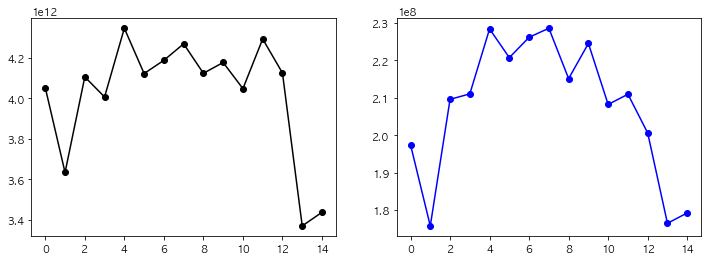

In [22]:
fig = plt.figure()
fig.suptitle('월별 카드 사용 총액 / 건수')

fig, ax_lst = plt.subplots(1, 2, figsize=(12,4))

ax_lst[0].plot(np.array(by_date["AMT"]), 'ko-')
ax_lst[1].plot(np.array(by_date["CNT"]), 'bo-')
plt.show()

In [23]:
holiday_num = pd.Series([9, 11, 11, 8, 9, 11, 8, 10, 11, 10, 9, 10, 11, 9, 9])
by_date["holiday_num"] = holiday_num

#### 지역별 데이터 만들기

In [24]:
by_area = pd.DataFrame(data.groupby(['CARD_SIDO_NM']).sum().reset_index(drop=False))

print(by_area["AMT"], by_area["CNT"])

0      1589611299919
1     14201885234869
2      3485130029864
3      2767620595248
4      1705650360934
5      3020064352604
6      1128913460716
7      4491306031541
8     14677131049031
9       204045817348
10     1255213605740
11     3056247462913
12     1839760777139
13     1961230185341
14     1343582224768
15     2103197375108
16     1465437185923
Name: AMT, dtype: int64 0      64382529
1     701143788
2     149370331
3     113078004
4      82758813
5     164232841
6      60900956
7     228178463
8     994077624
9      10456634
10     55429028
11    147173793
12     63787592
13     80723851
14     45168708
15     91093453
16     61076110
Name: CNT, dtype: int64


<Figure size 432x288 with 0 Axes>

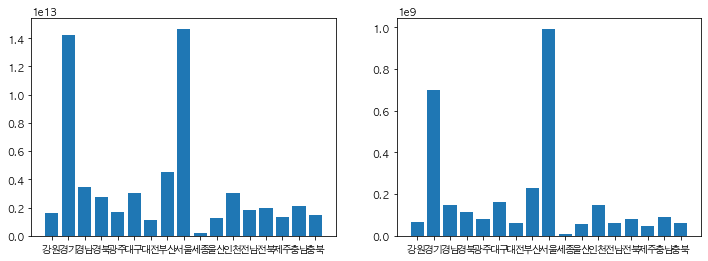

In [25]:
fig = plt.figure()
fig.suptitle('지역별 카드 사용 총액 / 건수')

fig, ax_lst = plt.subplots(1, 2, figsize=(12,4))

ax_lst[0].bar(by_area["CARD_SIDO_NM"], list(by_area["AMT"]))
ax_lst[1].bar(by_area["CARD_SIDO_NM"], list(by_area["CNT"]))
plt.show()

#### 업종별 변화율

In [65]:
data["STD_CLSS_NM"].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업',
       '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업',
       '면세점', '버스 운송업', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업',
       '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업'], dtype=object)

In [87]:
by_ind = pd.DataFrame(data.groupby(['STD_CLSS_NM', 'REG_YYMM']).sum())
by_ind_change = by_ind[["AMT", "CNT"]].pct_change().fillna(0)
print(by_ind_change)

                             AMT       CNT
STD_CLSS_NM REG_YYMM                      
건강보조식품 소매업  2019-01-01  0.000000  0.000000
            2019-02-01 -0.105646 -0.099433
            2019-03-01 -0.180366  0.011145
            2019-04-01 -0.018749 -0.025641
            2019-05-01  0.281277  0.158889
...                          ...       ...
휴양콘도 운영업    2019-11-01 -0.311184 -0.281145
            2019-12-01  0.588254  0.755197
            2020-01-01  0.676276  0.642190
            2020-02-01 -0.626101 -0.593544
            2020-03-01 -0.670386 -0.723967

[615 rows x 2 columns]


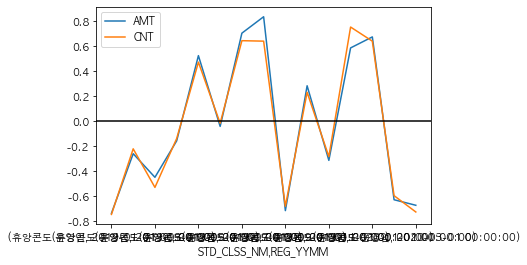

In [88]:
plot = by_ind_change.filter(like='휴양콘도', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

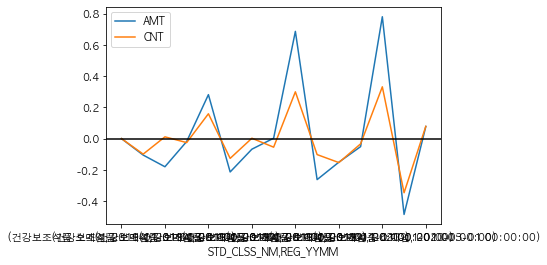

In [89]:
plot = by_ind_change.filter(like='건강보조', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

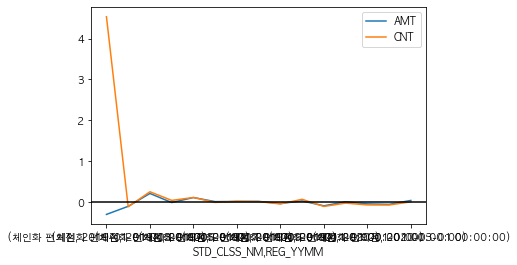

In [90]:
plot = by_ind_change.filter(like='편의점', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

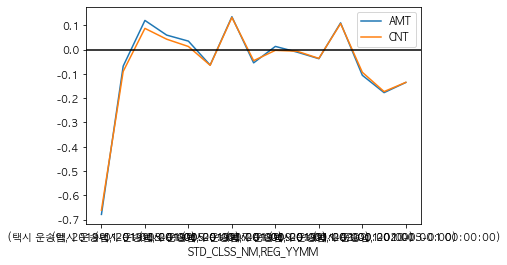

In [91]:
plot = by_ind_change.filter(like='택시', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

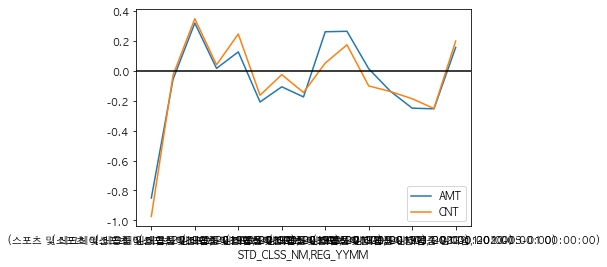

In [92]:
plot = by_ind_change.filter(like='스포츠 및', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

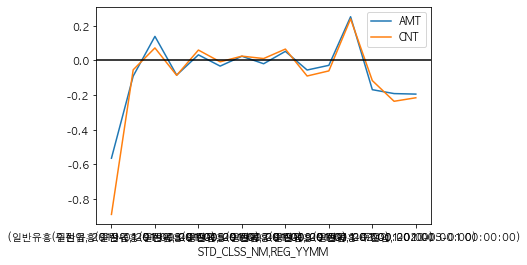

In [93]:
plot = by_ind_change.filter(like='일반유흥 주점업', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()

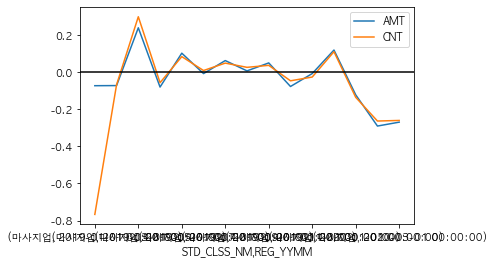

In [94]:
plot = by_ind_change.filter(like='마사지업', axis=0).plot()
plot.axhline(y=0, xmin=0, xmax=1, color="k")
plt.show()